# Walk on Mars data

In [6]:
%matplotlib widget

import obspy
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import spectrogram

## Read

In [48]:
stream_1 = obspy.read("06/06.UVW.mseed")
stream_2 = obspy.read("06/06.UVW_calib_ACC.mseed")

## Explore

In [61]:
stream_2[0].stats

         network: XB
         station: ELYSE
        location: 02
         channel: BHU
       starttime: 2021-06-06T00:00:00.025000Z
         endtime: 2021-06-06T23:59:59.475000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1727990
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'R', 'number_of_records': 30316, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 46565376})

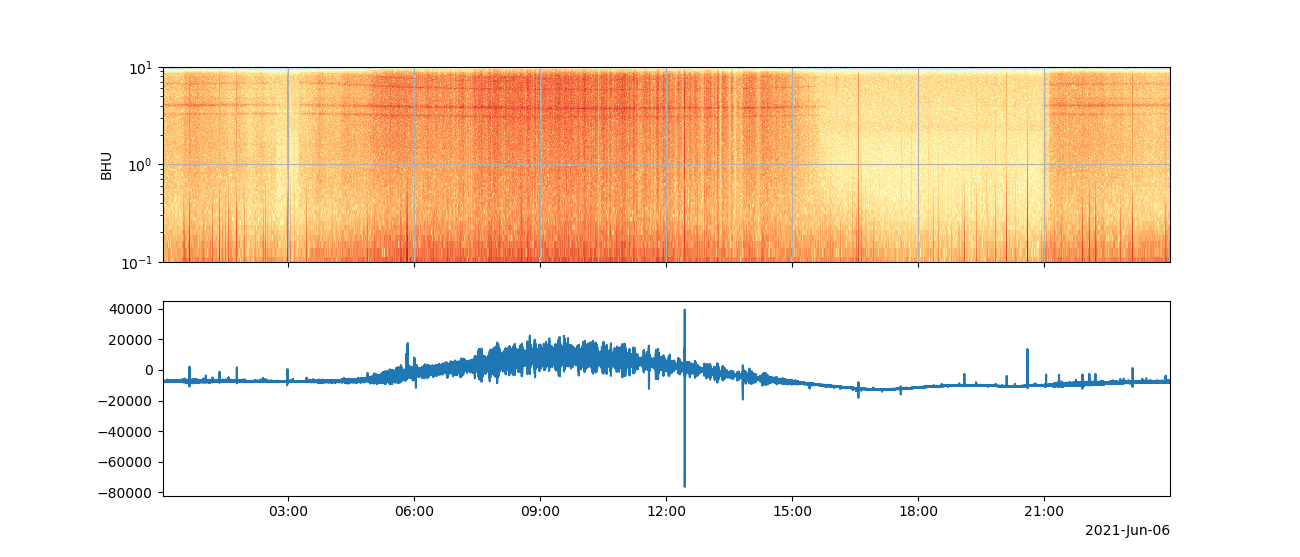

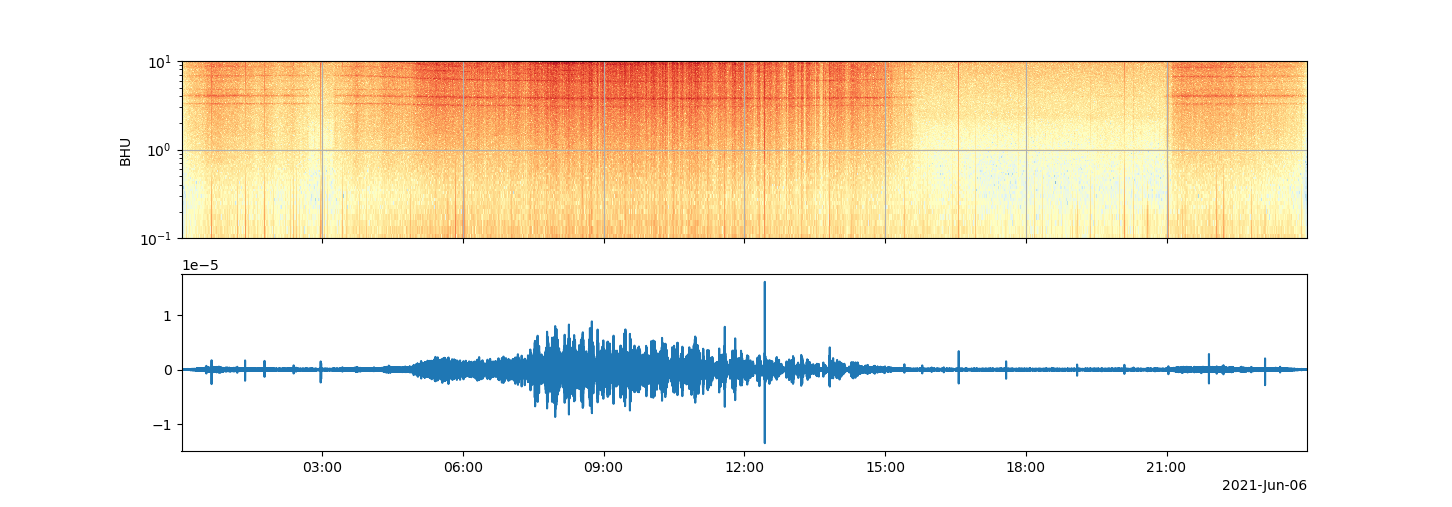

In [62]:
CHANNEL = 0
STREAMS = [stream_1.copy(), stream_2.copy()]
WINDOW_DURATION_SEC = 40

for index, stream in enumerate(STREAMS):

    # stream.filter(type="highpass", freq=2)

    data = [trace.data for trace in stream]
    times = [trace.times("matplotlib") for trace in stream]
    channels = [trace.stats.channel for trace in stream]

        sampling_rate = stream[0].stats.sampling_rate
        nperseg = int(WINDOW_DURATION_SEC * sampling_rate)
        noverlap = nperseg // 16

    fig, ax = plt.subplots(2, figsize=(12, 6), sharex=True, num=index, clear=True)

    frequency, t, s = spectrogram(data[0], fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)
    ax[0].set_ylim(0.1, sampling_rate / 2)
    ax[0].pcolormesh(t / 24 / 3600 + times[0][0], frequency, np.log(np.abs(s)), cmap="RdYlBu_r")
    ax[0].grid()
    ax[0].set_ylabel(channels[0])
    ax[0].set_ylim(0.1, sampling_rate / 2)
    ax[0].set_yscale("log")

    xticks = mdates.AutoDateLocator()
    xticklabels = mdates.ConciseDateFormatter(xticks)
    ax[0].xaxis.set_major_locator(xticks)
    ax[0].xaxis.set_major_formatter(xticklabels)

    ax[-1].plot(times[0], data[0])

    plt.show()